In [1]:
# Carga de modulos 
# 
# OS : rutinas para interactuar con el sistema operativo
import os 

# NUmpy : Implementa varias cosas del tema matricial 
import numpy as np

# Visualizacion
import matplotlib.pyplot as plt
import seaborn as sns

# Pandas : Preprocesamiento de informacion 
import pandas as pd 

# MOdulo re para procesar la columna Age
import re 

In [18]:
# Carguemos nuestro dataset 
df = pd.read_csv("https://raw.githubusercontent.com/robintux/Datasets4StackOverFlowQuestions/master/COVID19_clinical_trials.csv")

Rank                                                                       4
NCT Number                                                       NCT04416061
Title                      The Role of a Private Hospital in Hong Kong Am...
Acronym                                                             COVID-19
Status                                                Active, not recruiting
Study Results                                           No Results Available
Conditions                                                             COVID
Interventions                      Diagnostic Test: COVID 19 Diagnostic Test
Outcome Measures           Proportion of asymptomatic subjects|Proportion...
Sponsor/Collaborators                        Hong Kong Sanatorium & Hospital
Gender                                                                   All
Age                                                Child, Adult, Older Adult
Phases                                                                   NaN

In [19]:
# Preprocesamiento 

# Nombres de las columnas 
df.columns

Index(['Rank', 'NCT Number', 'Title', 'Acronym', 'Status', 'Study Results',
       'Conditions', 'Interventions', 'Outcome Measures',
       'Sponsor/Collaborators', 'Gender', 'Age', 'Phases', 'Enrollment',
       'Funded Bys', 'Study Type', 'Study Designs', 'Other IDs', 'Start Date',
       'Primary Completion Date', 'Completion Date', 'First Posted',
       'Results First Posted', 'Last Update Posted', 'Locations',
       'Study Documents', 'URL'],
      dtype='object')

In [20]:
# Los tipos de dato de cada columna
df.dtypes

Rank                         int64
NCT Number                  object
Title                       object
Acronym                     object
Status                      object
Study Results               object
Conditions                  object
Interventions               object
Outcome Measures            object
Sponsor/Collaborators       object
Gender                      object
Age                         object
Phases                      object
Enrollment                 float64
Funded Bys                  object
Study Type                  object
Study Designs               object
Other IDs                   object
Start Date                  object
Primary Completion Date     object
Completion Date             object
First Posted                object
Results First Posted        object
Last Update Posted          object
Locations                   object
Study Documents             object
URL                         object
dtype: object

In [21]:
# A partir de lo visto  pensamos que las columnas 
# Start Date                  object
# Primary Completion Date     object
# Completion Date             object
# First Posted                object
# Results First Posted        object (Verificar si todos los elementos son NaN)
# Last Update Posted          object
# Tienen informacion temporal 

# Transformar estas columnas a datos de tipo temporal (datetime)

df["Start Date"] =pd.to_datetime(df["Start Date"])
df["Primary Completion Date"] = pd.to_datetime(df["Primary Completion Date"])
df["Completion Date"] = pd.to_datetime(df["Completion Date"])
df["First Posted"] = pd.to_datetime(df["First Posted"])
df["Results First Posted"] = pd.to_datetime(df["Results First Posted"])
df["Last Update Posted"] = pd.to_datetime(df["Last Update Posted"])

In [22]:
# Verifiquemos los cambios
df.dtypes

Rank                                int64
NCT Number                         object
Title                              object
Acronym                            object
Status                             object
Study Results                      object
Conditions                         object
Interventions                      object
Outcome Measures                   object
Sponsor/Collaborators              object
Gender                             object
Age                                object
Phases                             object
Enrollment                        float64
Funded Bys                         object
Study Type                         object
Study Designs                      object
Other IDs                          object
Start Date                 datetime64[ns]
Primary Completion Date    datetime64[ns]
Completion Date            datetime64[ns]
First Posted               datetime64[ns]
Results First Posted       datetime64[ns]
Last Update Posted         datetim

In [23]:
# Explorar los valores perdidos : Contar los NA/NaN en cada columna 
(df.isna().sum()/df.shape[0])*100

Rank                        0.000000
NCT Number                  0.000000
Title                       0.000000
Acronym                    57.115684
Status                      0.000000
Study Results               0.000000
Conditions                  0.000000
Interventions              15.320768
Outcome Measures            0.605222
Sponsor/Collaborators       0.000000
Gender                      0.172921
Age                         0.000000
Phases                     42.555767
Enrollment                  0.587930
Funded Bys                  0.000000
Study Type                  0.000000
Study Designs               0.605222
Other IDs                   0.017292
Start Date                  0.587930
Primary Completion Date     0.622514
Completion Date             0.622514
First Posted                0.000000
Results First Posted       99.377486
Last Update Posted          0.000000
Locations                  10.115857
Study Documents            96.852845
URL                         0.000000
d

In [24]:
# Exploremos las columnas Gender (Variable cualitativa) y Age (Variable cuantitativa)
# 
# Si Gender es cualitativa, entonces me interesa saber cuales son los posibles 
# valores de esa columna 
df.Gender.unique()

array(['All', 'Female', 'Male', nan], dtype=object)

<AxesSubplot: xlabel='Gender', ylabel='count'>

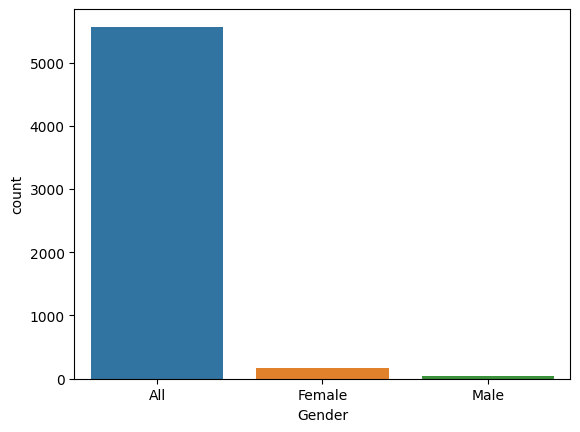

In [26]:
# Deseo observar graficamente la distribucion de los valores en la columna Gender
# Usemos un countplot de seaborn
sns.countplot(data=df, x='Gender')

In [ ]:
# Conclusion de este grafico : No es posible realizar una segmentacion usando la
# variable genero 

In [ ]:
# Columna Age
df.Age

0          18 Years and older   (Adult, Older Adult)
1          18 Years and older   (Adult, Older Adult)
2          18 Years and older   (Adult, Older Adult)
3                          Child, Adult, Older Adult
4                     18 Years to 48 Years   (Adult)
                            ...                     
5778    21 Years to 100 Years   (Adult, Older Adult)
5779           3 Months to 18 Years   (Child, Adult)
5780                  18 Years to 64 Years   (Adult)
5781            8 Years to 20 Years   (Child, Adult)
5782       18 Years and older   (Adult, Older Adult)
Name: Age, Length: 5783, dtype: object

In [ ]:
# Lista de posibles valores de la columna Age
df.Age.unique()

array(['18 Years and older \xa0 (Adult, Older Adult)',
       'Child, Adult, Older Adult', '18 Years to 48 Years \xa0 (Adult)',
       '18 Years to 75 Years \xa0 (Adult, Older Adult)',
       '18 Years to 45 Years \xa0 (Adult)',
       '18 Years to 99 Years \xa0 (Adult, Older Adult)',
       '18 Years to 55 Years \xa0 (Adult)',
       '15 Years and older \xa0 (Child, Adult, Older Adult)',
       '18 Years to 80 Years \xa0 (Adult, Older Adult)',
       '45 Years and older \xa0 (Adult, Older Adult)',
       '20 Years to 100 Years \xa0 (Adult, Older Adult)',
       '8 Years to 88 Years \xa0 (Child, Adult, Older Adult)',
       '5 Years to 65 Years \xa0 (Child, Adult, Older Adult)',
       'up to 99 Years \xa0 (Child, Adult, Older Adult)',
       '18 Years to 85 Years \xa0 (Adult, Older Adult)',
       '18 Years to 65 Years \xa0 (Adult, Older Adult)',
       'up to 29 Days \xa0 (Child)',
       '18 Years to 70 Years \xa0 (Adult, Older Adult)',
       '18 Years to 59 Years \xa0 (Adult)',
  

In [ ]:
# La mejor forma de limpiar este formato complicado es usando expresiones
# regulares : modulo re
dir(re)

['A',
 'ASCII',
 'DEBUG',
 'DOTALL',
 'I',
 'IGNORECASE',
 'L',
 'LOCALE',
 'M',
 'MULTILINE',
 'Match',
 'Pattern',
 'RegexFlag',
 'S',
 'Scanner',
 'T',
 'TEMPLATE',
 'U',
 'UNICODE',
 'VERBOSE',
 'X',
 '_MAXCACHE',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '__version__',
 '_cache',
 '_compile',
 '_compile_repl',
 '_expand',
 '_locale',
 '_pickle',
 '_special_chars_map',
 '_subx',
 'compile',
 'copyreg',
 'enum',
 'error',
 'escape',
 'findall',
 'finditer',
 'fullmatch',
 'functools',
 'match',
 'purge',
 'search',
 'split',
 'sre_compile',
 'sre_parse',
 'sub',
 'subn',
 'template']

In [ ]:
# Lo primero es conocer cada funcion operativa que compone al modulo re
# 'compile',
#  'copyreg',
#  'enum',
#  'error',
#  'escape',
#  'findall',
#  'finditer',
#  'fullmatch',
#  'functools',
#  'match',
#  'purge',
#  'search',
#  'split',
#  'sre_compile',
#  'sre_parse',
#  'sub',
#  'subn',
#  'template'

# help(re.search)
help(re.findall)


Help on function findall in module re:

findall(pattern, string, flags=0)
    Return a list of all non-overlapping matches in the string.
    
    If one or more capturing groups are present in the pattern, return
    a list of groups; this will be a list of tuples if the pattern
    has more than one group.
    
    Empty matches are included in the result.



In [ ]:
#  Probemos la funcion findall
re.findall(r'\(.*\)', df.Age[666])[0]

'(Adult, Older Adult)'

In [ ]:
# Definamos una funcion que nos permita limpiar cada elemento de la 
# columna Age
# Luego de hacer una prueba sobre todas las componente de Age nos dimos cuenta
# que hay observaciones que no tienen ese patron ()
def cleanAge(age):
  if len(re.findall(r'\(.*\)', age)):
    return re.findall(r'\(.*\)', age)[0]
  return "("+ age + ")"

In [ ]:
# Probemos nuestra funcion
cleanAge(df.Age[2000])

'(Child, Adult, Older Adult)'

In [ ]:
# Apliquemos esta funcion a cada elemento de la columna Age
ageData = df.Age.apply(lambda x : cleanAge(x))

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


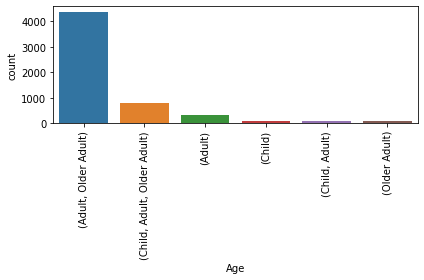

In [ ]:
# Una vez realizada la limpieza sobre la columna Age, podemos ver como
# se distribuyen los posibles valores en la columna Age
plt.xticks(rotation = 90)
sns.countplot("Age", data = pd.DataFrame(ageData))
plt.tight_layout()
plt.show()